<a href="https://colab.research.google.com/github/luanavsr/cfg_estudos/blob/main/Metodos_Quantitativos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Métodos Quantitativos
### O objetivo com esse arquivo é aplicar os conhecimentos que aprendo no estudo para o CFG (Anbima) na linguagem python. Existem melhores formas de programar do que a continda nesse notebook, mas o meu objetivo é apenas reforçar os conhecinhementos em python e finanças.  

- Estatística
  - Medidas de posição central
  - Medidas de Retorno
  - Medidas de dispersão
  - Medidas de Associação entre duas variáveis
  - Risco de uma carteira com 2 ou 3 ativos

- Distribuição de probabilidade
  - Conceitos de probabilidade
  - Simulação de Monte Carlo
  - Amostragem
  - Estimação

- Teste de Hipótese
  - Hipótese nula e alternativa
  - Teste de Hipótese, Significância e Regras de Decisão
  - Erros Tipo I e Tipo II
  - Teste Uni-caudal ou Bicaudal
  - Probabilidade  da Significância (Valor p)
  - Análise de Variância (ANOVA) e a Estatística F
  -  Teste de Hipótese para a média populacional
  - Teste de Hipótese para a variância única

- Regressão Linear
  - Regressão Linear simples
  - Regressão Linear Múltipla

- Indicadores de Análise Técnica
  - Rastreadores de Tendência
  - Indicadores de Reversão
  - Indicadores de Volume


In [1]:
# importando os pacotes para a próxima seção

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader.data as web

!pip install yfinance --upgrade --nocache-dir
import yfinance as yf
yf.pdr_override()


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: --nocache-dir


[*********************100%***********************]  3 of 3 completed


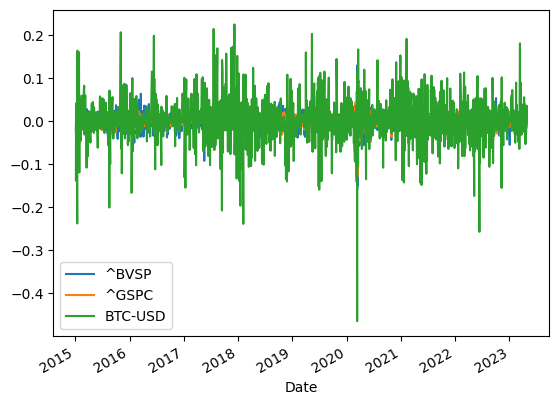

<Axes: xlabel='Date'>

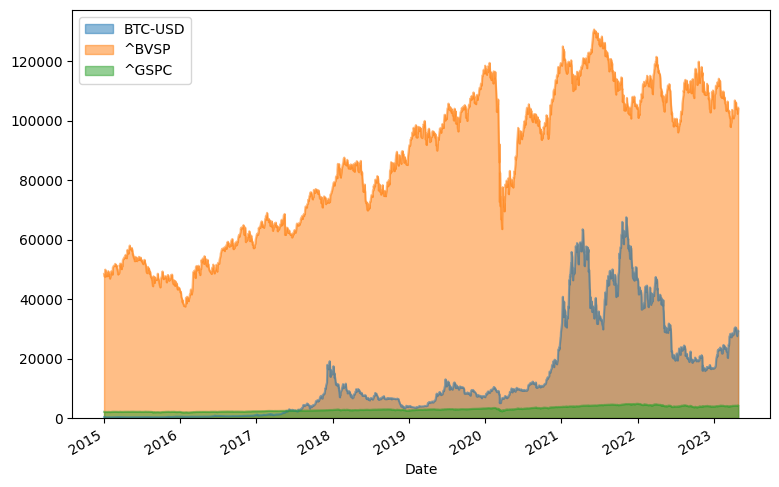

In [2]:
# dados que serão usados durante todo o estudo
start_date = '2015-01-01'
end_date =  '2023-05-01' 
stocks = ['^BVSP', '^GSPC', 'BTC-USD']

# baixando os dados, filtrando para pegar o preço de fechamento ajustado e retirandos os dias sem observações. Dados baixados: Série de pontos do Ibovespa, S&P500 e preço do BTC usd.
df_prices = yf.download(stocks, start = start_date, end = end_date)['Adj Close'].dropna()

# transformandos os preços em retornos, mas antes é importante saber a diferença entre log retornos e retornos simples. 

"""
Log returns x Simple returns

Retornos em log (log returns) são calculados da seguinte maneira log(Rt/Rt-1), onde Rt é o valor atual e Rt-1 é o valor anterior. Os retornos em log tem a propriedade de transformar os 
retornos aritiméticos (retornos simples) em adições. Em outras palavras, quando os retornos em log são somados ao longo de um período eles fornecem o retorno total do período. 

Os retornos simples ou aritméticos,  são calculados como a diferença percentual entre o valor atual e o valor anterior de um ativo [(Rt - Rt-1) / Rt-1]. Os retornos simples são mais
intuitivos, pois representam a variação percentual direta entre dois pontos no tempo. Mas, eles não possuem a propriedade de aditividade dos retornos em log, o que significa que não 
podem ser somados ao longo do tempo para obter o retorno total. 

Em resumo, os retornos em log são usados com mais frequência em análises financeiras quantitativas, como modelagem de séries temporais e cálculos estatísticos, enquanto os retornos simples 
são mais comuns em interpretações intuitivas e análises de curto prazo. A escolha entre eles depende do contexto e objetivo específico da análise financeira, mas aqui usaremos os retornos em log. 

"""

# calculando os retornos em log
df_returns =  np.log(df_prices/df_prices.shift(1)).dropna() # outra forma de calcular é usando a propriedade do quociente np.log(df_prices) - np.log(df_prices.shift(1))


# caso queira calcular os retornos simples é só fazer  
df_simple_returns = df_prices.pct_change()

df_returns

# plotando os gráficos de preços e retornos
df_returns.plot.line(y = ['^BVSP','^GSPC', 'BTC-USD'])
plt.show()

df_prices.plot(kind='area', stacked=False, figsize=(9,6))

## Estatística
  - Medidas de posição central
  - Medidas de Retorno
  - Medidas de dispersão
  - Medidas de Associação entre duas variáveis
  - Risco de uma carteira com 2 ou 3 ativos

In [3]:
# Média aritmética
"""
A média aritmética é uma medida de posição central, seja de uma população ou amostra, sendo obtida somando todos os elementos da população ou amostra (xi) e dividindo o resultado
pelo número de elementos da população/amostra (n)

Sum(xi) / n

"""

# calculando a média aritmética dos retornos para cada série
media_ibov = (sum(df_returns['^BVSP'])/ len(df_returns['^BVSP']))
print(f'\n média diária dos retornos do ibov:{media_ibov*100}%')

# forma mais fácil de calcular a média das variáveis de um dataframe
media = df_returns.mean()
print(f'\n média diária dos retornos dos ativos: \n {media*100} ')

# Média ponderada
"""
A média ponderada é simular a média aritimética comum, mas  a diferença é que na média aritmética todos os valores contribuiem com peso igual, enquanto que na média ponderada se considera
o peso (pi) de cada termo (xi).

sum(xi.pi)

"""

# calculando a média ponderada de uma carteira 50% bitcoin, 30% ibovespa e 20% s&P.

media_sp = (sum(df_returns['^GSPC'])/ len(df_returns['^GSPC'])) 
media_btc = (sum(df_returns['BTC-USD'])/ len(df_returns['BTC-USD']))
media_pond_sp = 0.2 * media_sp 
media_pond_btc = 0.5* media_btc
media_pond_ibov = 0.3* media_ibov 

print(f'\n a média de retorno diário da carteira é: {media_pond_sp + media_pond_btc + media_pond_ibov}, \n onde: média sp = {media_pond_sp}, \n média btc = {media_pond_btc} \n média ibov = {media_pond_ibov}')

# Média Geométrica
"""
A média geométrica é calculada como a raiz enésima do produto dos valores, sendo usada principalmente quando se deseja calcular uma média de taxas de crescimento, retornos, ou índices de desempenho

(xi1 * xi2 * ... * xin)^ 1/n
"""
# calculando a média geométrica
media_geo = (3*9*8)**(1/3)
print(f'\n a média geométrica dos números 3,9 e 8 é: {media_geo}')

# Mediana
"""
A mediana é uma estatística que representa o valor central de um conjunto de dados ordenados. Ou seja, é o valor que divide o conjunto de dados em duas partes iguais. Ela é uma medida de localização
robusta, o que significa que ela não é sensível a valores extremos (outliers), sendo especialmente útil quando há valores discrepantes ou quando os dados não seguem uma distribuição simétrica.

Para calcular a mediana, os seguintes passos são geralmente seguidos:

    Ordenar os dados em ordem crescente ou decrescente.
    Identificar o valor central ou a média dos dois valores centrais, dependendo se o número de elementos é ímpar ou par, respectivamente.
"""

# calculando a mediana 
print(f'\n a mediana dos retornos diários é: \n {df_returns.median()}')

# Moda
"""
A Moda representa o valor ou valores mais frequentes em um conjunto de dados, sendo útil para identificar os valores mais comuns ou populares em um conjunto de dados. 
Diferentemente da média e da mediana, a moda não é uma medida de tendência central, pois não se baseia em uma posição específica dos dados. Em vez disso, ela se concentra na frequência dos valores,
sendo que um conjunto de dados pode ter uma moda única (unimodal), onde um valor é o mais frequente, ou pode ter múltiplas modas (multimodal), onde dois ou mais valores são igualmente frequentes ou pode 
não ter moda.

Para calcular a moda basta analisar quais valores são mais frequentes na amostra/população.
"""

# calculando a moda
print(f'\n a moda dos retornos diários é: \n {df_returns.mode()}')


 média diária dos retornos do ibov:0.0381645073107494%

 média diária dos retornos dos ativos: 
 BTC-USD    0.225686
^BVSP      0.038165
^GSPC      0.035140
dtype: float64 

 a média de retorno diário da carteira é: 0.0013132056978368855, 
 onde: média sp = 7.027969461569852e-05, 
 média btc = 0.001128432481288939 
 média ibov = 0.00011449352193224818

 a média geométrica dos números 3,9 e 8 é: 5.999999999999999

 a mediana dos retornos diários é: 
 BTC-USD    0.002044
^BVSP      0.000601
^GSPC      0.000609
dtype: float64

 a moda dos retornos diários é: 
        BTC-USD     ^BVSP     ^GSPC
0    -0.464730 -0.159930 -0.127652
1    -0.257227 -0.149910 -0.099945
2    -0.238740 -0.129811 -0.079010
3    -0.237558 -0.109244 -0.068622
4    -0.207530 -0.092107 -0.053222
...        ...       ...       ...
2004  0.198656  0.063887  0.058226
2005  0.203046  0.068986  0.060544
2006  0.206911  0.072285  0.067968
2007  0.214596  0.092475  0.088808
2008  0.225119  0.130223  0.089683

[2009 rows x 3

a assimetria dos retornos diários é: 
 BTC-USD   -0.603471
^BVSP     -1.041937
^GSPC     -0.870689
dtype: float64 


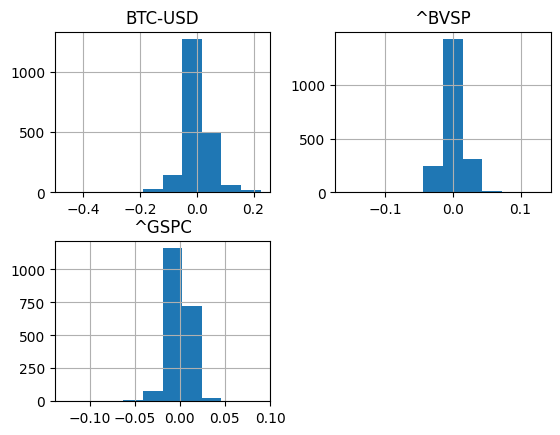

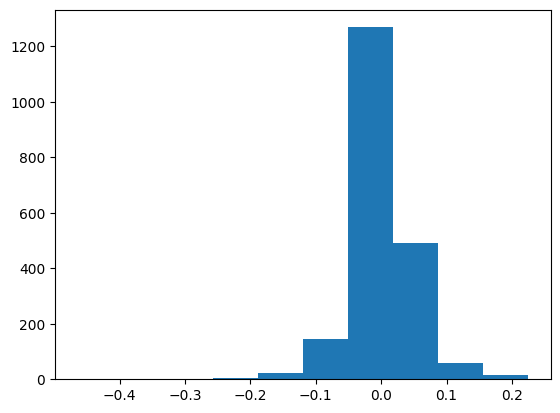

dados com simetria  



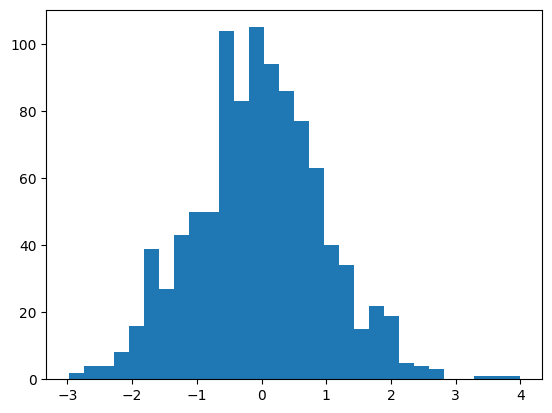

dados com simetria negativa 



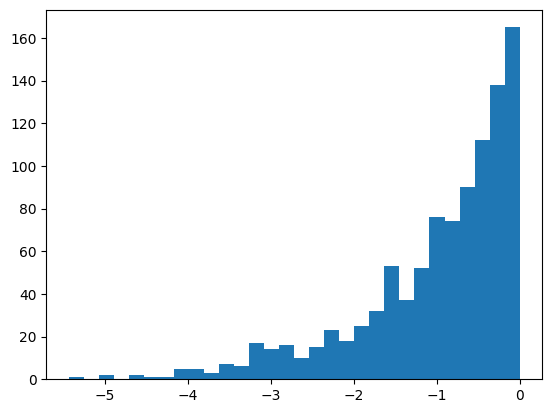

dados com simetria positiva 



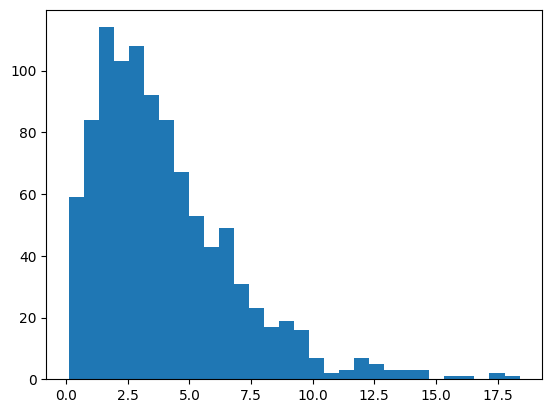

In [4]:
# Assimetria (skewness)
"""
A assimetria é uma medida que avalia a simetria ou a falta de simetria em uma distribuição de dados. Ela mede a forma como os valores estão distribuídos em relação a média da distribuição.
Uma distribuição pode ser simétria, positivamente assimétrica ou negativamente assimétrica. Em finanças, a aplicação de da simetria se refere a distribuição dos retornos
de um ativo ou portfólio ao longo do tempo, ajudando aos investidos a avaliarem o pergil de risco dos ativos. Uma distribuição simétrica sugere que os retornos positivos e negativos 
possuem a mesma probabilidade de ocorrência e magnitude semelhante. No entanto, caso os retornos sejam assimétricos, implica que o os retornos positivos e negativos não são igualmente 
prováveis, o que pode impactar a avaliação de risco e tomada de decisão

A assimetria positiva indica que a cauda da distribuição é estendida para a direita, indicando que eistem valores maiores que se afastam da média, sendo a média maior que a mediana. Em finanças
a assimetria positiva é um indicativo de oportunidades de lucro, mas indica um risco assimétrico com a possibilidade de grandes perdas.

A assimetria negatia indica que a cauda da distribuição é estendida para a esquerda (fat tail), evidenciando que os retornos negativos são mais extremos que os retornos positivos, sendo a média
menor que a mediana. Nesse caso, a uma probabilidade maior de retornos negativos extremos. 

Assimetria = (n / ((n - 1) * (n - 2))) * Σ((Xi - Média)^3) / Desvio padrão^3 -> assimetria pelo método de terceiro momento padronizado
"""

# Calculando a assimetria dos dados

print(f'a assimetria dos retornos diários é: \n {df_returns.skew()} ')

# Histograma para identificar visualmente a forma da distribuição 
df_returns.hist()
plt.show()

# outra forma
plt.hist(df_returns['BTC-USD']) #podemos tanto pelo valo da assimetria, quanto pelo desenho do histograma, afirmar que o BTC-USD apresenta assimetria negativo, sendo a probabilidade de ocorrer retornos negativos, maior que ocorrer retornos positivos. 
plt.show()

# desenhando simetria positiva, negativa e assimétrica


# Dados com simetria 
print('dados com simetria  \n')
data = np.random.normal(loc=0, scale=1, size=1000)
plt.hist(data, bins=30)
plt.show()

# Dados com simetria negativa
print('dados com simetria negativa \n')
data = np.random.exponential(scale=1, size=1000) * -1
plt.hist(data, bins=30)
plt.show()

# Dados com simetria positiva
print('dados com simetria positiva \n')
data = np.random.gamma(shape=2, scale=2, size=1000)
plt.hist(data, bins=30)
plt.show()

In [5]:
# Quartis
"""
Os quartis dividem um conjunto de dados em três pontos de cortes primeiro quartil, segundo quartil (mediana) e terceiro quartil, representando diferentes porcentagens da distribuição 
e são usados para descrever a dispersão e a distribuição dos dados. O segundo quartil é a mediana dos dados, ou seja, ela divide os dados em duas partes iguais, representando 50% dos dados abaixo
e 50% dos dados acima desse valor.

A partir do segundo quartil, podemos calcular a amplitude interquartil (AIQ), que é a diferença entre o terceiro quartil e o primeiro quartil, representando a dispersão dos dados ao redor da mediana.
Os quartis também são usados para calcular outros elementos estatísticos, como os limites inferior e superior para detectar outliers (intervalo interquartil), além de serem usados em boxplots e 
gráficos de dispersão para visualização e análise dos dados.
Q1 = onde se encontram 25% dos valores menores
Q2 = mediana, valor onde se encontra 50% da amostra ordenada
Q3 = onde se encntra 25% dos valores mais elevados
Fórmula = Quartil/100 * (n-1) + 1 -> o valor resultante é a posição do elemento, o numpy, abaixo, calcula de outra maneira. mas a duas devem ser próximas. 
"""
dados = [3, 5, 6, 7, 8, 9]

# Cálculo dos quartis
q1 = np.percentile(dados, 25)
q2 = np.percentile(dados, 50)
q3 = np.percentile(dados, 75)

print("Primeiro quartil (Q1):", q1)
print("Segundo quartil (Q2):", q2)
print("Terceiro quartil (Q3):", q3)

Primeiro quartil (Q1): 5.25
Segundo quartil (Q2): 6.5
Terceiro quartil (Q3): 7.75


In [7]:
# Medidas de retorno

"""
O retorno esperado de um portfólio é o retorno médio que se espera obter com determinado conjunto de investimentos ponderados, sendo calulado com base nos retornos
históricos dos ativos componentes do portfólio vezes suas respectivas proporções.
Para calcular o retorno esperado de um portfólio, siga estes passos: Determine os pesos ou proporções de alocação para cada ativo no portfólio. Esses pesos devem somar 1 (ou 100%).
Por exemplo, se um portfólio possui 50% ações, 30% títulos e 20% fundos imobiliários, os pesos seriam 0.5, 0.3 e 0.2, respectivamente.Obtenha os retornos históricos de cada ativo do 
portfólio. Isso pode ser feito usando dados passados ou estimativas de retornos futuros.

Por exemplo, considere os seguintes retornos anuais: ações (10%), títulos (5%), fundos imobiliários (8%).

Multiplique os pesos de alocação pelos retornos de cada ativo e some os resultados.
No exemplo dado, o cálculo seria: (0.5 * 0.10) + (0.3 * 0.05) + (0.2 * 0.08) = 0.05 + 0.015 + 0.016 = 0.081 (ou 8.1%).

Portanto, o retorno esperado do portfólio seria de 8.1%.
"""

# Calculando o retorno do portfólio 50% BTC, 30% Ibov e 20% SP500 

pesos = [0.5, 0.3, 0.2]

# calculando o retorno do portfólio dia a dia.
retorno_esperado = (pesos * df_returns).sum(axis=1)
print("Retorno esperado do portfólio:", retorno_esperado)


Retorno esperado do portfólio: Date
2015-01-05   -0.078815
2015-01-06    0.022152
2015-01-07    0.025350
2015-01-08   -0.012580
2015-01-09    0.003916
                ...   
2023-04-24   -0.013781
2023-04-25    0.008719
2023-04-26   -0.001391
2023-04-27    0.023818
2023-04-28    0.003740
Length: 2009, dtype: float64


,BTC-USD,^BVSP,^GSPC
Date,,,
2023-04-24,-0.025844,-0.004032,0.001754
2023-04-25,0.028023,-0.007019,-0.015937
2023-04-26,0.004058,-0.008836,-0.003849
2023-04-27,0.036313,0.005954,0.019377
2023-04-28,-0.004541,0.014555,0.008219


In [9]:
# Medidas de dispersão (Volatilidade)

"""
As medidas de volatilidade no mercado financeiro são utilizadas para avaliar o grau de variação dos preços de um ativo ao longo do tempo. 
Existem várias formas de calcular a volatilidade de um ativo, entre elas a variância, desvio padrão, beta, volatilidade implícita ou vol histórica, etc.

Essas medidas de risco, são  medidas de risco ex-post é uma medida de risco que é calculada com base em dados históricos. Ela é usada para avaliar o risco de um investimento após o fato, 
utilizando informações passadas sobre os retornos ou variações de preços do ativo.
"""

# Variância
"""
A variância mede a dispersão dos dados em relação a média. quanto maior a variância, maior é a dispersão dos dados e maior é a sua volatilidade. E quanto menor sua variância
indica que os valores estão mais próximos da média, portanto menor risco. E se a variância for zero, isso implica que todos os dados são iguais a média.
Lembrando que a variância não pode ser negativa, veja a fórmula abaixo para entender.

Variância = Σ((X - μ)²) / n -1 (amostral)
    Σ representa a soma
    X é o valor individual do conjunto de dados
    μ é a média dos dados
    N é o número total de dados no conjunto
"""

0.0037397999999999997